<a href="https://colab.research.google.com/github/quannguyen2704/bai-tap-fuzzy/blob/main/bt_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes Risk Level: 59.4293095279177


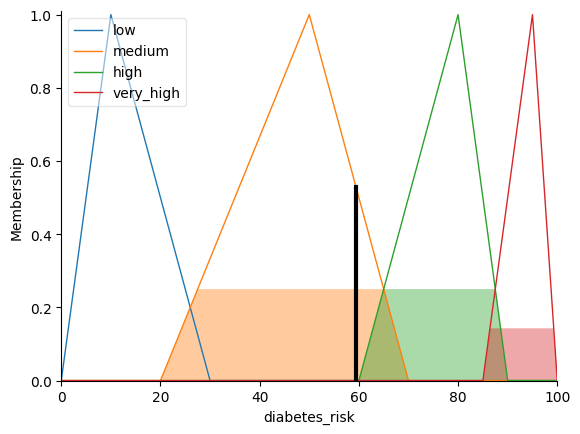

In [ ]:
#Bai 2.2

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


blood_sugar = ctrl.Antecedent(np.arange(50, 301, 1), 'blood_sugar')
bmi = ctrl.Antecedent(np.arange(10, 41, 0.1), 'bmi')
urination = ctrl.Antecedent(np.arange(0, 3, 1), 'urination')
fatigue = ctrl.Antecedent(np.arange(0, 3, 1), 'fatigue')


diabetes_risk = ctrl.Consequent(np.arange(0, 101, 1), 'diabetes_risk')


blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [50, 50, 80])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [80, 110, 120])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [120, 160, 200])
blood_sugar['very_high'] = fuzz.trimf(blood_sugar.universe, [180, 250, 300])

bmi['underweight'] = fuzz.trimf(bmi.universe, [10, 10, 18.5])
bmi['normal'] = fuzz.trimf(bmi.universe, [18.5, 21, 24.9])
bmi['overweight'] = fuzz.trimf(bmi.universe, [25, 27.5, 29.9])
bmi['obese'] = fuzz.trimf(bmi.universe, [30, 35, 40])


urination['rarely'] = fuzz.trimf(urination.universe, [0, 0, 1])
urination['sometimes'] = fuzz.trimf(urination.universe, [0, 1, 2])
urination['often'] = fuzz.trimf(urination.universe, [1, 2, 2])


fatigue['low'] = fuzz.trimf(fatigue.universe, [0, 0, 1])
fatigue['moderate'] = fuzz.trimf(fatigue.universe, [0, 1, 2])
fatigue['high'] = fuzz.trimf(fatigue.universe, [1, 2, 2])


diabetes_risk['low'] = fuzz.trimf(diabetes_risk.universe, [0, 10, 30])
diabetes_risk['medium'] = fuzz.trimf(diabetes_risk.universe, [20, 50, 70])
diabetes_risk['high'] = fuzz.trimf(diabetes_risk.universe, [60, 80, 90])
diabetes_risk['very_high'] = fuzz.trimf(diabetes_risk.universe, [85, 95, 100])


rule1 = ctrl.Rule(blood_sugar['very_high'] & urination['often'], diabetes_risk['very_high'])
rule2 = ctrl.Rule(blood_sugar['very_high'] & urination['sometimes'], diabetes_risk['high'])
rule3 = ctrl.Rule(blood_sugar['high'] & urination['often'], diabetes_risk['high'])
rule4 = ctrl.Rule(blood_sugar['normal'] & urination['rarely'], diabetes_risk['low'])
rule5 = ctrl.Rule(blood_sugar['very_high'] & bmi['obese'], diabetes_risk['very_high'])
rule6 = ctrl.Rule(blood_sugar['very_high'] & bmi['overweight'], diabetes_risk['high'])
rule7 = ctrl.Rule(blood_sugar['high'] & bmi['overweight'], diabetes_risk['high'])
rule8 = ctrl.Rule(blood_sugar['high'] & bmi['normal'], diabetes_risk['medium'])
rule9 = ctrl.Rule(blood_sugar['normal'] & bmi['normal'], diabetes_risk['low'])
rule10 = ctrl.Rule(blood_sugar['very_high'] & fatigue['high'], diabetes_risk['very_high'])
rule11 = ctrl.Rule(blood_sugar['high'] & fatigue['high'], diabetes_risk['high'])
rule12 = ctrl.Rule(blood_sugar['high'] & fatigue['moderate'], diabetes_risk['medium'])
rule13 = ctrl.Rule(blood_sugar['normal'] & fatigue['low'], diabetes_risk['low'])


diabetes_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
diabetes_sim = ctrl.ControlSystemSimulation(diabetes_ctrl)


diabetes_sim.input['blood_sugar'] = 190
diabetes_sim.input['bmi'] = 28
diabetes_sim.input['urination'] = 2
diabetes_sim.input['fatigue'] = 1


diabetes_sim.compute()


print('Diabetes Risk Level:', diabetes_sim.output['diabetes_risk'])


diabetes_risk.view(sim=diabetes_sim)

4.700000000000224


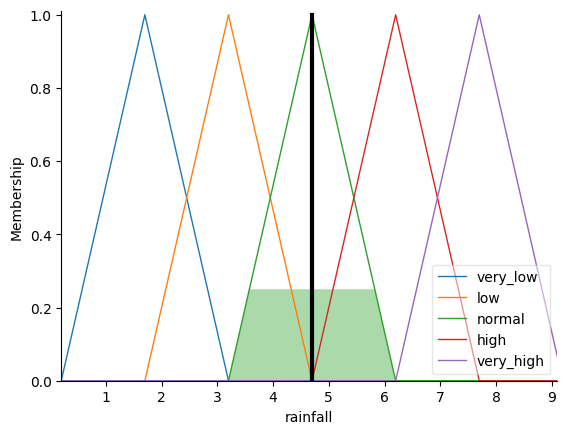

In [ ]:
#Bai 2.1
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind = ctrl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
temperature = ctrl.Antecedent(np.arange(20.4, 40.3, 0.1), 'temperature')
rainfall = ctrl.Consequent(np.arange(0.2, 9.2, 0.1), 'rainfall')

wind['very_low'] = fuzz.trimf(wind.universe, [0.7, 1.1, 1.5])
wind['low'] = fuzz.trimf(wind.universe, [1.1, 1.5, 1.9])
wind['normal'] = fuzz.trimf(wind.universe, [1.5, 1.9, 2.3])
wind['high'] = fuzz.trimf(wind.universe, [1.9, 2.3, 2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.3, 2.7, 3.1])
temperature['very_low'] = fuzz.trimf(temperature.universe, [20.4, 23.6, 26.8])
temperature['low'] = fuzz.trimf(temperature.universe, [23.6, 26.8, 30])
temperature['normal'] = fuzz.trimf(temperature.universe, [26.8, 30, 33.2])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 33.2, 36.4])
temperature['very_high'] = fuzz.trimf(temperature.universe, [33.2, 36.4, 39.6])
rainfall['very_low'] = fuzz.trimf(rainfall.universe, [0.2, 1.7, 3.2])
rainfall['low'] = fuzz.trimf(rainfall.universe, [1.7, 3.2, 4.7])
rainfall['normal'] = fuzz.trimf(rainfall.universe, [3.2, 4.7, 6.2])
rainfall['high'] = fuzz.trimf(rainfall.universe, [4.7, 6.2, 7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [6.2, 7.7, 9.2])

rule1 = ctrl.Rule(wind['very_low'] & temperature['very_low'], rainfall['very_low'])
rule2 = ctrl.Rule(wind['low'] & temperature['low'], rainfall['low'])
rule3 = ctrl.Rule(wind['normal'] & temperature['normal'], rainfall['normal'])
rule4 = ctrl.Rule(wind['high'] & temperature['high'], rainfall['high'])
rule5 = ctrl.Rule(wind['very_high'] & temperature['very_high'], rainfall['very_high'])


rainfalling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)

rainfalling.input['wind'] = 2.2
rainfalling.input['temperature'] = 30

rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(sim=rainfalling)


Final Price: 9.183333333333334


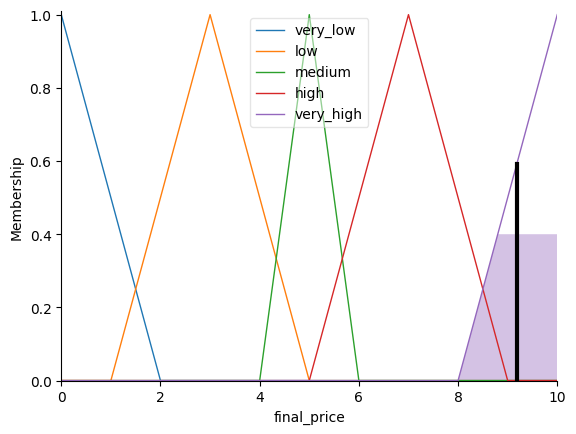

In [ ]:
#Bai 2.3

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl



demand = ctrl.Antecedent(np.arange(0, 11, 1), 'demand')
competitor_pricing = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_pricing')
production_cost = ctrl.Antecedent(np.arange(0, 11, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonality')
stock_level = ctrl.Antecedent(np.arange(0, 11, 1), 'stock_level')
final_price = ctrl.Consequent(np.arange(0, 11, 1), 'final_price')


demand['low'] = fuzz.trimf(demand.universe, [0, 0, 5])
demand['medium'] = fuzz.trimf(demand.universe, [3, 5, 7])
demand['high'] = fuzz.trimf(demand.universe, [5, 10, 10])

competitor_pricing['low'] = fuzz.trimf(competitor_pricing.universe, [0, 0, 5])
competitor_pricing['medium'] = fuzz.trimf(competitor_pricing.universe, [3, 5, 7])
competitor_pricing['high'] = fuzz.trimf(competitor_pricing.universe, [5, 10, 10])

production_cost['low'] = fuzz.trimf(production_cost.universe, [0, 0, 5])
production_cost['medium'] = fuzz.trimf(production_cost.universe, [3, 5, 7])
production_cost['high'] = fuzz.trimf(production_cost.universe, [5, 10, 10])

seasonality['off_peak'] = fuzz.trimf(seasonality.universe, [0, 0, 5])
seasonality['normal'] = fuzz.trimf(seasonality.universe, [3, 5, 7])
seasonality['peak'] = fuzz.trimf(seasonality.universe, [5, 10, 10])

stock_level['low'] = fuzz.trimf(stock_level.universe, [0, 0, 5])
stock_level['medium'] = fuzz.trimf(stock_level.universe, [3, 5, 7])
stock_level['high'] = fuzz.trimf(stock_level.universe, [5, 10, 10])

final_price['very_low'] = fuzz.trimf(final_price.universe, [0, 0, 2])
final_price['low'] = fuzz.trimf(final_price.universe, [1, 3, 5])
final_price['medium'] = fuzz.trimf(final_price.universe, [4, 5, 6])
final_price['high'] = fuzz.trimf(final_price.universe, [5, 7, 9])
final_price['very_high'] = fuzz.trimf(final_price.universe, [8, 10, 10])


rule1 = ctrl.Rule(demand['high'] & competitor_pricing['high'] & stock_level['low'], final_price['very_high'])
rule2 = ctrl.Rule(demand['high'] & seasonality['peak'] & stock_level['low'], final_price['very_high'])
rule3 = ctrl.Rule(demand['medium'] & production_cost['high'] & stock_level['low'], final_price['very_high'])
rule4 = ctrl.Rule(demand['high'] & competitor_pricing['medium'] & stock_level['medium'], final_price['high'])
rule5 = ctrl.Rule(demand['medium'] & competitor_pricing['high'] & stock_level['low'], final_price['high'])
rule6 = ctrl.Rule(demand['medium'] & competitor_pricing['high'] & stock_level['low'], final_price['high'])
rule7 = ctrl.Rule(demand['high'] & seasonality['peak'] & stock_level['medium'], final_price['high'])
rule8 = ctrl.Rule(demand['medium'] & competitor_pricing['medium'] & stock_level['medium'], final_price['medium'])
rule9 = ctrl.Rule(demand['low'] & competitor_pricing['high'] & stock_level['medium'], final_price['medium'])
rule10 = ctrl.Rule(demand['medium'] & production_cost['medium'] & stock_level['medium'], final_price['medium'])
rule11 = ctrl.Rule(demand['low'] & competitor_pricing['low'] & stock_level['high'], final_price['low'])
rule12 = ctrl.Rule(demand['medium'] & production_cost['low'] & stock_level['high'], final_price['low'])
rule13 = ctrl.Rule(demand['low'] & seasonality['off_peak'] & stock_level['high'], final_price['low'])
rule14 = ctrl.Rule(demand['low'] & competitor_pricing['low'] & stock_level['high'], final_price['very_low'])
rule15 = ctrl.Rule(demand['low'] & seasonality['off_peak'] & stock_level['high'], final_price['very_low'])
rule16 = ctrl.Rule(demand['medium'] & competitor_pricing['low'] & stock_level['high'], final_price['very_low'])
rule17 = ctrl.Rule(demand['medium'] & competitor_pricing['low'] & stock_level['high'], final_price['very_low'])


pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17])
fuzzy_pricing = ctrl.ControlSystemSimulation(pricing_ctrl)


fuzzy_pricing.input['demand'] = 7
fuzzy_pricing.input['competitor_pricing'] = 6
fuzzy_pricing.input['production_cost'] = 5
fuzzy_pricing.input['seasonality'] = 8
fuzzy_pricing.input['stock_level'] = 3


fuzzy_pricing.compute()


print('Final Price:', fuzzy_pricing.output['final_price'])
final_price.view(sim=fuzzy_pricing)

Wash Time: 6.3177570093457955
Water Level: 6.3177570093457955


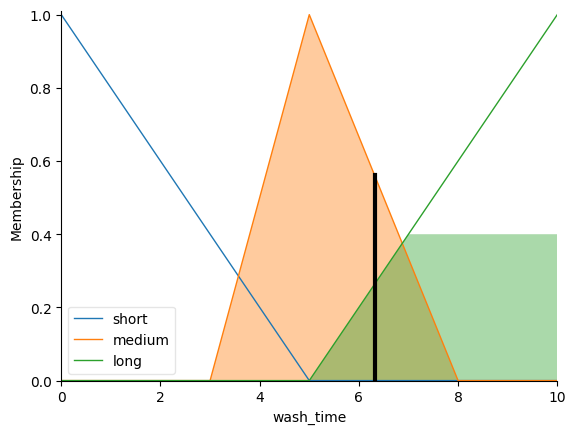

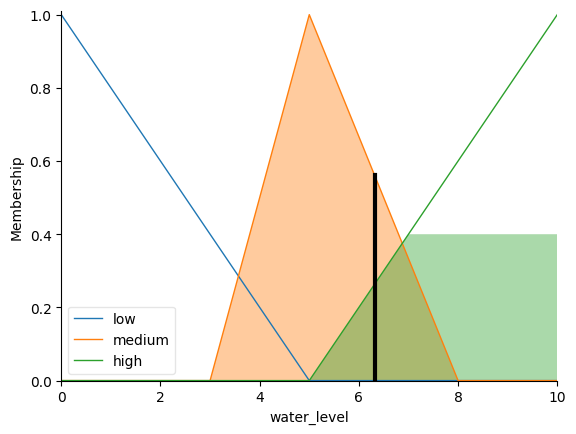

In [ ]:
#Bai 2.4

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


load = ctrl.Antecedent(np.arange(0, 11, 1), 'load')
dirt_level = ctrl.Antecedent(np.arange(0, 11, 1), 'dirt_level')
fabric_type = ctrl.Antecedent(np.arange(0, 11, 1), 'fabric_type')
wash_time = ctrl.Consequent(np.arange(0, 11, 1), 'wash_time')
water_level = ctrl.Consequent(np.arange(0, 11, 1), 'water_level')


load['small'] = fuzz.trimf(load.universe, [0, 0, 5])
load['medium'] = fuzz.trimf(load.universe, [3, 5, 8])
load['large'] = fuzz.trimf(load.universe, [5, 10, 10])

dirt_level['low'] = fuzz.trimf(dirt_level.universe, [0, 0, 5])
dirt_level['medium'] = fuzz.trimf(dirt_level.universe, [3, 5, 8])
dirt_level['high'] = fuzz.trimf(dirt_level.universe, [5, 10, 10])

fabric_type['delicate'] = fuzz.trimf(fabric_type.universe, [0, 0, 5])
fabric_type['normal'] = fuzz.trimf(fabric_type.universe, [3, 5, 8])
fabric_type['heavy'] = fuzz.trimf(fabric_type.universe, [5, 10, 10])

wash_time['short'] = fuzz.trimf(wash_time.universe, [0, 0, 5])
wash_time['medium'] = fuzz.trimf(wash_time.universe, [3, 5, 8])
wash_time['long'] = fuzz.trimf(wash_time.universe, [5, 10, 10])

water_level['low'] = fuzz.trimf(water_level.universe, [0, 0, 5])
water_level['medium'] = fuzz.trimf(water_level.universe, [3, 5, 8])
water_level['high'] = fuzz.trimf(water_level.universe, [5, 10, 10])


rules = [
    ctrl.Rule(load['small'] & dirt_level['low'], (wash_time['short'], water_level['low'])),
    ctrl.Rule(load['small'] & dirt_level['medium'], (wash_time['medium'], water_level['medium'])),
    ctrl.Rule(load['small'] & dirt_level['high'], (wash_time['long'], water_level['medium'])),
    ctrl.Rule(load['medium'] & dirt_level['low'], (wash_time['medium'], water_level['medium'])),
    ctrl.Rule(load['medium'] & dirt_level['medium'], (wash_time['long'], water_level['medium'])),
    ctrl.Rule(load['medium'] & dirt_level['high'], (wash_time['long'], water_level['high'])),
    ctrl.Rule(load['large'] & dirt_level['low'], (wash_time['medium'], water_level['high'])),
    ctrl.Rule(load['large'] & dirt_level['medium'], (wash_time['long'], water_level['high'])),
    ctrl.Rule(load['large'] & dirt_level['high'], (wash_time['long'], water_level['high'])),
    ctrl.Rule(fabric_type['delicate'], (wash_time['short'], water_level['low'])),
    ctrl.Rule(fabric_type['normal'], (wash_time['medium'], water_level['medium'])),
    ctrl.Rule(fabric_type['heavy'], (wash_time['long'], water_level['high'])),
    ctrl.Rule(load['large'] & dirt_level['high'] & fabric_type['heavy'], (wash_time['long'], water_level['high'])),
    ctrl.Rule(load['small'] & dirt_level['low'] & fabric_type['delicate'], (wash_time['short'], water_level['low'])),
    ctrl.Rule(load['medium'] & dirt_level['medium'] & fabric_type['normal'], (wash_time['medium'], water_level['medium']))
]


washing_ctrl = ctrl.ControlSystem(rules)
washing_sim = ctrl.ControlSystemSimulation(washing_ctrl)

washing_sim.input['load'] = 6
washing_sim.input['dirt_level'] = 7
washing_sim.input['fabric_type'] = 5

washing_sim.compute()


print('Wash Time:', washing_sim.output['wash_time'])
print('Water Level:', washing_sim.output['water_level'])


wash_time.view(sim=washing_sim)
water_level.view(sim=washing_sim)


Fan Speed: 68.39204424590515
Cooling Level: 71.08290660814438


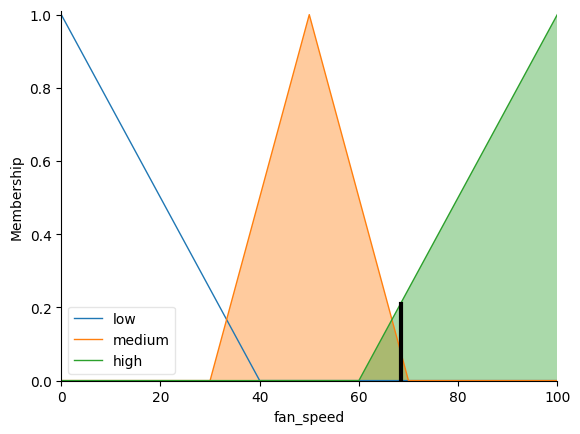

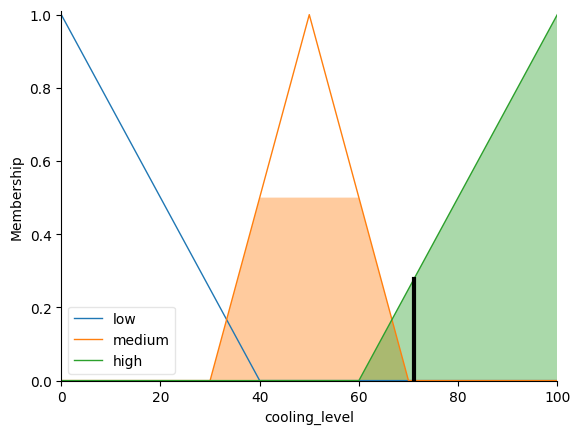

In [ ]:
#Bai 2.5

import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

temp = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
people = ctrl.Antecedent(np.arange(1, 11, 1), 'people')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')
cooling_level = ctrl.Consequent(np.arange(0, 101, 1), 'cooling_level')

temp['cold'] = fuzz.trimf(temp.universe, [0, 0, 10])
temp['cool'] = fuzz.trimf(temp.universe, [5, 15, 20])
temp['comfortable'] = fuzz.trimf(temp.universe, [18, 22, 26])
temp['warm'] = fuzz.trimf(temp.universe, [24, 30, 35])
temp['hot'] = fuzz.trimf(temp.universe, [30, 40, 40])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 40])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [60, 100, 100])


people['few'] = fuzz.trimf(people.universe, [1, 1, 4])
people['moderate'] = fuzz.trimf(people.universe, [3, 5, 7])
people['many'] = fuzz.trimf(people.universe, [6, 10, 10])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 40])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [30, 50, 70])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [60, 100, 100])

cooling_level['low'] = fuzz.trimf(cooling_level.universe, [0, 0, 40])
cooling_level['medium'] = fuzz.trimf(cooling_level.universe, [30, 50, 70])
cooling_level['high'] = fuzz.trimf(cooling_level.universe, [60, 100, 100])

rule1 = ctrl.Rule(temp['cold'], [fan_speed['low'], cooling_level['low']])
rule2 = ctrl.Rule(temp['cool'], [fan_speed['low'], cooling_level['low']])
rule3 = ctrl.Rule(temp['comfortable'], [fan_speed['medium'], cooling_level['medium']])
rule4 = ctrl.Rule(temp['warm'], [fan_speed['high'], cooling_level['high']])
rule5 = ctrl.Rule(temp['hot'], [fan_speed['high'], cooling_level['high']])

rule6 = ctrl.Rule(humidity['low'], cooling_level['low'])
rule7 = ctrl.Rule(humidity['medium'], cooling_level['medium'])
rule8 = ctrl.Rule(humidity['high'], cooling_level['high'])

rule9 = ctrl.Rule(people['few'], fan_speed['low'])
rule10 = ctrl.Rule(people['moderate'], fan_speed['medium'])
rule11 = ctrl.Rule(people['many'], fan_speed['high'])

rule12 = ctrl.Rule(temp['hot'] & humidity['high'] & people['many'], [fan_speed['high'], cooling_level['high']])
rule13 = ctrl.Rule(temp['comfortable'] & humidity['medium'] & people['moderate'], [fan_speed['medium'], cooling_level['medium']])
rule14 = ctrl.Rule(temp['cool'] & humidity['low'] & people['few'], [fan_speed['low'], cooling_level['low']])


control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14])
ac_control = ctrl.ControlSystemSimulation(control_system)


ac_control.input['temperature'] = 30
ac_control.input['humidity'] = 60
ac_control.input['people'] = 5


ac_control.compute()

print("Fan Speed:", ac_control.output['fan_speed'])
print("Cooling Level:", ac_control.output['cooling_level'])
fan_speed.view(sim=ac_control)
cooling_level.view(sim=ac_control)


Thời gian nấu: 14.936285097192227 phút
Mức công suất: 83.33333333333336 %


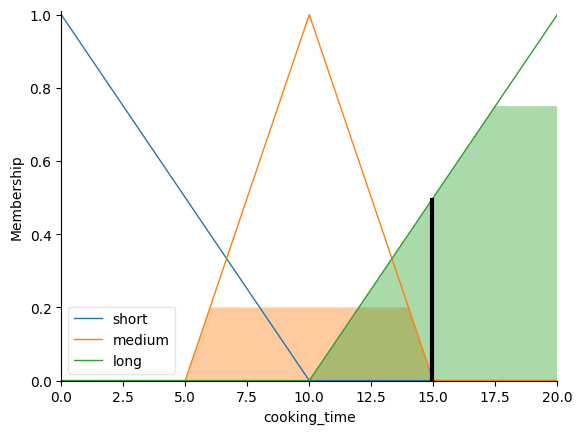

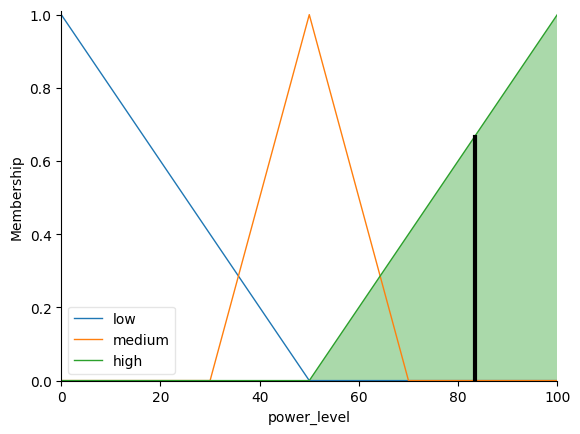

In [ ]:
#Bai 2.6

import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl


food_weight = ctrl.Antecedent(np.arange(0, 101, 1), 'food_weight')
food_type = ctrl.Antecedent(np.arange(0, 3, 1), 'food_type')
food_temp = ctrl.Antecedent(np.arange(0, 61, 1), 'food_temp')


cooking_time = ctrl.Consequent(np.arange(0, 21, 1), 'cooking_time')
power_level = ctrl.Consequent(np.arange(0, 101, 1), 'power_level')


food_weight['light'] = fuzz.trimf(food_weight.universe, [0, 0, 50])
food_weight['medium'] = fuzz.trimf(food_weight.universe, [25, 50, 75])
food_weight['heavy'] = fuzz.trimf(food_weight.universe, [50, 100, 100])

food_type['soft'] = fuzz.trimf(food_type.universe, [0, 0, 1])
food_type['medium'] = fuzz.trimf(food_type.universe, [0, 1, 2])
food_type['hard'] = fuzz.trimf(food_type.universe, [1, 2, 2])

food_temp['cold'] = fuzz.trimf(food_temp.universe, [0, 0, 20])
food_temp['warm'] = fuzz.trimf(food_temp.universe, [10, 25, 40])
food_temp['hot'] = fuzz.trimf(food_temp.universe, [30, 60, 60])


cooking_time['short'] = fuzz.trimf(cooking_time.universe, [0, 0, 10])
cooking_time['medium'] = fuzz.trimf(cooking_time.universe, [5, 10, 15])
cooking_time['long'] = fuzz.trimf(cooking_time.universe, [10, 20, 20])


power_level['low'] = fuzz.trimf(power_level.universe, [0, 0, 50])
power_level['medium'] = fuzz.trimf(power_level.universe, [30, 50, 70])
power_level['high'] = fuzz.trimf(power_level.universe, [50, 100, 100])


rule1 = ctrl.Rule(food_weight['light'], cooking_time['short'])
rule2 = ctrl.Rule(food_weight['medium'], cooking_time['medium'])
rule3 = ctrl.Rule(food_weight['heavy'], cooking_time['long'])
rule4 = ctrl.Rule(food_type['soft'], power_level['low'])
rule5 = ctrl.Rule(food_type['medium'], power_level['medium'])
rule6 = ctrl.Rule(food_type['hard'], power_level['high'])
rule7 = ctrl.Rule(food_temp['cold'], cooking_time['long'])
rule8 = ctrl.Rule(food_temp['warm'], cooking_time['medium'])
rule9 = ctrl.Rule(food_temp['hot'], cooking_time['short'])
rule10 = ctrl.Rule(food_weight['heavy'] & food_type['hard'] & food_temp['cold'],
                    (cooking_time['long'], power_level['high']))
rule11 = ctrl.Rule(food_weight['medium'] & food_type['soft'] & food_temp['warm'],
                    (cooking_time['medium'], power_level['low']))
rule12 = ctrl.Rule(food_weight['light'] & food_type['medium'] & food_temp['hot'],
                    (cooking_time['short'], power_level['medium']))


cooking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                                   rule7, rule8, rule9, rule10, rule11, rule12])
cooking_sim = ctrl.ControlSystemSimulation(cooking_ctrl)


cooking_sim.input['food_weight'] = 70
cooking_sim.input['food_type'] = 2
cooking_sim.input['food_temp'] = 5

cooking_sim.compute()
print("Thời gian nấu:", cooking_sim.output['cooking_time'],'phút')
print("Mức công suất:", cooking_sim.output['power_level'],'%')
cooking_time.view(sim=cooking_sim)
power_level.view(sim=cooking_sim)

Cooking Time: 1.6666666666666665
Heat Level: 1.222222222222222


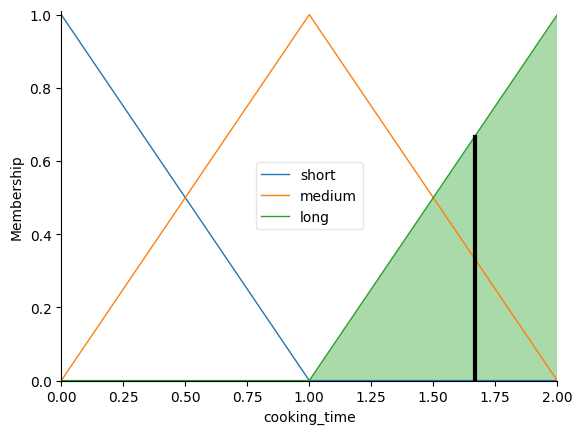

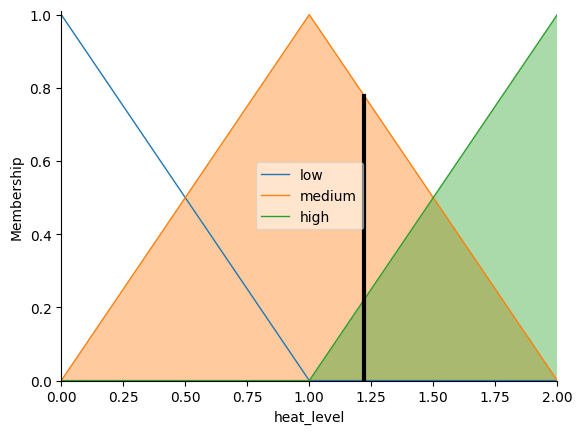

In [9]:
#Bai 2.7

import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl


food_type = ctrl.Antecedent(np.arange(0, 3, 1), 'food_type')
food_weight = ctrl.Antecedent(np.arange(0, 3, 1), 'food_weight')
initial_temp = ctrl.Antecedent(np.arange(0, 3, 1), 'initial_temp')
water_content = ctrl.Antecedent(np.arange(0, 3, 1), 'water_content')


cooking_time = ctrl.Consequent(np.arange(0, 3, 1), 'cooking_time')
heat_level = ctrl.Consequent(np.arange(0, 3, 1), 'heat_level')

food_type.automf(names=['soft', 'medium', 'hard'])
food_weight.automf(names=['light', 'medium', 'heavy'])
initial_temp.automf(names=['cold', 'warm', 'hot'])
water_content.automf(names=['low', 'medium', 'high'])


cooking_time.automf(names=['short', 'medium', 'long'])
heat_level.automf(names=['low', 'medium', 'high'])

rule1 = ctrl.Rule(food_weight['light'] & initial_temp['hot'], cooking_time['short'])
rule2 = ctrl.Rule(food_weight['medium'] & initial_temp['warm'], cooking_time['medium'])
rule3 = ctrl.Rule(food_weight['heavy'] & initial_temp['cold'], cooking_time['long'])
rule4 = ctrl.Rule(food_type['soft'], heat_level['low'])
rule5 = ctrl.Rule(food_type['medium'], heat_level['medium'])
rule6 = ctrl.Rule(food_type['hard'], heat_level['high'])
rule7 = ctrl.Rule(water_content['low'], heat_level['low'])
rule8 = ctrl.Rule(water_content['medium'], heat_level['medium'])
rule9 = ctrl.Rule(water_content['high'], heat_level['high'])



cooking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11])
cooking_sim = ctrl.ControlSystemSimulation(cooking_ctrl)


cooking_sim.input['food_type'] = 1
cooking_sim.input['food_weight'] = 2
cooking_sim.input['initial_temp'] = 0
cooking_sim.input['water_content'] = 2


cooking_sim.compute()

print(f"Cooking Time: {cooking_sim.output['cooking_time']}")
print(f"Heat Level: {cooking_sim.output['heat_level']}")
cooking_time.view(sim=cooking_sim)
heat_level.view(sim=cooking_sim)



lieu_dung_thuoc: system.output['lieu_dung_thuoc']
lieu_phap_oxy: system.output['lieu_phap_oxy']
dieu_chinh_tinh_mach: system.output['dieu_chinh_tinh_mach']


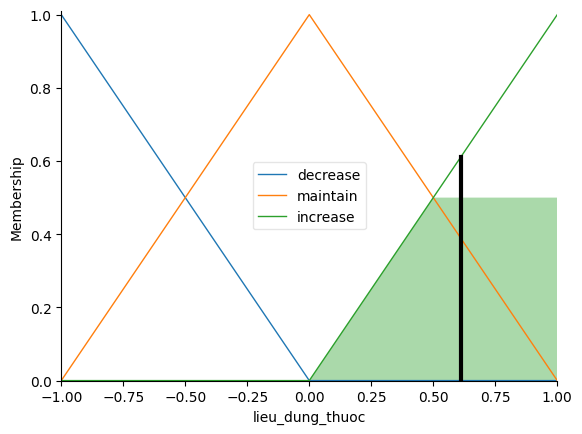

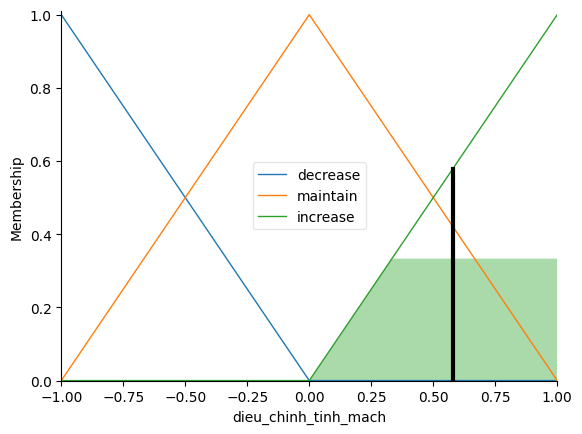

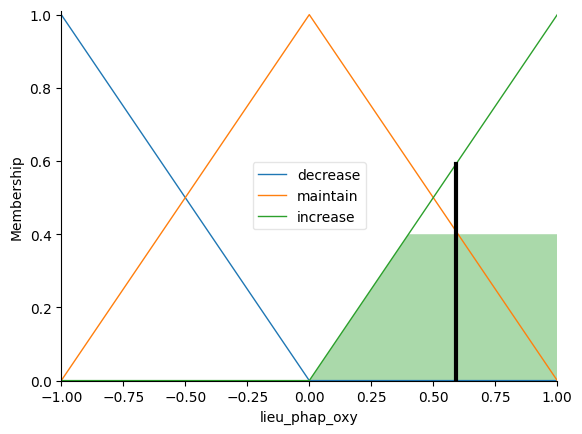

In [14]:
#Bai  2.8

import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl


heart_rate = ctrl.Antecedent(np.arange(40, 161, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(60, 181, 1), 'blood_pressure')
body_temp = ctrl.Antecedent(np.arange(34, 41, 0.1), 'body_temp')
oxygen_level = ctrl.Antecedent(np.arange(85, 101, 1), 'oxygen_level')
blood_sugar = ctrl.Antecedent(np.arange(50, 201, 1), 'blood_sugar')

lieu_dung_thuoc = ctrl.Consequent(np.arange(-1, 2, 1), 'lieu_dung_thuoc')
dieu_chinh_tinh_mach = ctrl.Consequent(np.arange(-1, 2, 1), 'dieu_chinh_tinh_mach')
lieu_phap_oxy = ctrl.Consequent(np.arange(-1, 2, 1), 'lieu_phap_oxy')

heart_rate['low'] = fuzz.trimf(heart_rate.universe, [40, 40, 60])
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [60, 75, 100])
heart_rate['high'] = fuzz.trimf(heart_rate.universe, [100, 140, 160])

blood_pressure['low'] = fuzz.trimf(blood_pressure.universe, [60, 60, 90])
blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [90, 110, 120])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [120, 150, 180])

body_temp['low'] = fuzz.trimf(body_temp.universe, [34, 34, 36])
body_temp['normal'] = fuzz.trimf(body_temp.universe, [36, 37, 37.5])
body_temp['high'] = fuzz.trimf(body_temp.universe, [37.5, 39, 40])

oxygen_level['low'] = fuzz.trimf(oxygen_level.universe, [85, 85, 90])
oxygen_level['normal'] = fuzz.trimf(oxygen_level.universe, [90, 95, 100])

blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [50, 50, 70])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [70, 110, 140])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [140, 160, 200])


lieu_dung_thuoc['decrease'] = fuzz.trimf(lieu_dung_thuoc.universe, [-1, -1, 0])
lieu_dung_thuoc['maintain'] = fuzz.trimf(lieu_dung_thuoc.universe, [-0.5, 0, 0.5])
lieu_dung_thuoc['increase'] = fuzz.trimf(lieu_dung_thuoc.universe, [0, 1, 1])

dieu_chinh_tinh_mach['decrease'] = fuzz.trimf(dieu_chinh_tinh_mach.universe, [-1, -1, 0])
dieu_chinh_tinh_mach['maintain'] = fuzz.trimf(dieu_chinh_tinh_mach.universe, [-0.5, 0, 0.5])
dieu_chinh_tinh_mach['increase'] = fuzz.trimf(dieu_chinh_tinh_mach.universe, [0, 1, 1])

lieu_phap_oxy['decrease'] = fuzz.trimf(lieu_phap_oxy.universe, [-1, -1, 0])
lieu_phap_oxy['maintain'] = fuzz.trimf(lieu_phap_oxy.universe, [-0.5, 0, 0.5])
lieu_phap_oxy['increase'] = fuzz.trimf(lieu_phap_oxy.universe, [0, 1, 1])

# Định nghĩa các quy tắc mờ
rules = [
    ctrl.Rule(heart_rate['low'] & blood_pressure['low'], [dieu_chinh_tinh_mach['increase'], lieu_dung_thuoc['increase']]),
    ctrl.Rule(heart_rate['high'] & blood_pressure['high'], lieu_dung_thuoc['decrease']),
    ctrl.Rule(heart_rate['normal'] & blood_pressure['normal'], lieu_dung_thuoc['maintain']),
    ctrl.Rule(body_temp['high'] & oxygen_level['low'], [lieu_phap_oxy['increase'], lieu_dung_thuoc['increase']]),
    ctrl.Rule(body_temp['low'] & oxygen_level['low'], [lieu_phap_oxy['increase'], dieu_chinh_tinh_mach['increase']]),
    ctrl.Rule(blood_sugar['high'], lieu_dung_thuoc['increase']),
    ctrl.Rule(blood_sugar['low'], lieu_dung_thuoc['decrease']),
    ctrl.Rule(blood_sugar['normal'], lieu_dung_thuoc['maintain']),
    ctrl.Rule(blood_pressure['high'] & blood_sugar['high'] & heart_rate['high'], lieu_dung_thuoc['decrease']),
    ctrl.Rule(blood_pressure['low'] & oxygen_level['low'] & heart_rate['low'], [dieu_chinh_tinh_mach['increase'], lieu_phap_oxy['increase'], lieu_dung_thuoc['increase']]),
    ctrl.Rule(body_temp['high'] & blood_pressure['high'] & oxygen_level['normal'], lieu_dung_thuoc['increase']),
    ctrl.Rule(body_temp['normal'] & oxygen_level['normal'], lieu_dung_thuoc['maintain']),
    ctrl.Rule(blood_pressure['high'] & blood_sugar['low'], lieu_dung_thuoc['maintain']),
    ctrl.Rule(heart_rate['low'] & body_temp['high'], lieu_dung_thuoc['increase'])
]


system_ctrl = ctrl.ControlSystem(rules)
system = ctrl.ControlSystemSimulation(system_ctrl)


system.input['heart_rate'] = 50
system.input['blood_pressure'] = 80
system.input['body_temp'] = 38.5
system.input['oxygen_level'] = 88
system.input['blood_sugar'] = 180

# Tính toán kết quả
system.compute()

print("lieu_dung_thuoc: system.output['lieu_dung_thuoc']")
print("lieu_phap_oxy: system.output['lieu_phap_oxy']")
print("dieu_chinh_tinh_mach: system.output['dieu_chinh_tinh_mach']")
lieu_dung_thuoc.view(sim=system)
dieu_chinh_tinh_mach.view(sim=system)
lieu_phap_oxy.view(sim=system)

Review Classification Output: 0.23333333333333334


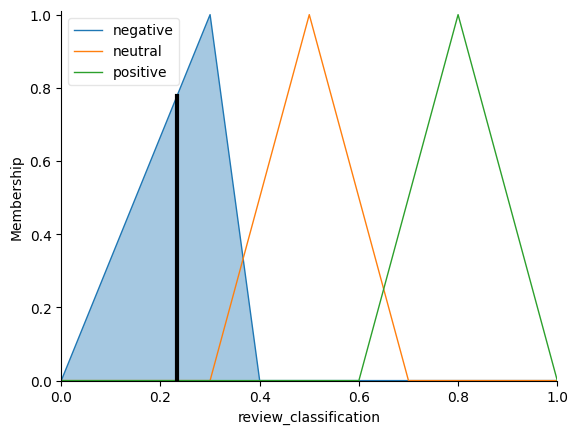

In [5]:
#Bai 2.9

import skfuzzy as fuzz
import skfuzzy.control as ctrl
import numpy as np


sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'sentiment_score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'emotion_intensity')
positive_words = ctrl.Antecedent(np.arange(0, 6, 1), 'positive_words')
negative_words = ctrl.Antecedent(np.arange(0, 6, 1), 'negative_words')

review_classification = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'review_classification')


sentiment_score['negative'] = fuzz.trimf(sentiment_score.universe, [0, 0.3, 0.4])
sentiment_score['neutral'] = fuzz.trimf(sentiment_score.universe, [0.3, 0.5, 0.7])
sentiment_score['positive'] = fuzz.trimf(sentiment_score.universe, [0.6, 0.8, 1])

emotion_intensity['low'] = fuzz.trimf(emotion_intensity.universe, [0, 0.3, 0.4])
emotion_intensity['medium'] = fuzz.trimf(emotion_intensity.universe, [0.3, 0.5, 0.7])
emotion_intensity['high'] = fuzz.trimf(emotion_intensity.universe, [0.6, 0.8, 1])

positive_words['few'] = fuzz.trimf(positive_words.universe, [0, 1, 2])
positive_words['some'] = fuzz.trimf(positive_words.universe, [2, 3, 5])
positive_words['many'] = fuzz.trimf(positive_words.universe, [4, 5, 6])

negative_words['few'] = fuzz.trimf(negative_words.universe, [0, 1, 2])
negative_words['some'] = fuzz.trimf(negative_words.universe, [2, 3, 5])
negative_words['many'] = fuzz.trimf(negative_words.universe, [4, 5, 6])

review_classification['negative'] = fuzz.trimf(review_classification.universe, [0, 0.3, 0.4])
review_classification['neutral'] = fuzz.trimf(review_classification.universe, [0.3, 0.5, 0.7])
review_classification['positive'] = fuzz.trimf(review_classification.universe, [0.6, 0.8, 1])


rule1 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['high'], review_classification['negative'])
rule2 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['low'], review_classification['neutral'])
rule3 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'], review_classification['neutral'])
rule4 = ctrl.Rule(sentiment_score['positive'] & emotion_intensity['high'], review_classification['positive'])
rule5 = ctrl.Rule(positive_words['many'] & negative_words['few'], review_classification['positive'])
rule6 = ctrl.Rule(positive_words['few'] & negative_words['many'], review_classification['negative'])
rule7 = ctrl.Rule(positive_words['some'] & negative_words['some'], review_classification['neutral'])
rule8 = ctrl.Rule(sentiment_score['negative'] & negative_words['many'] & emotion_intensity['high'], review_classification['negative'])
rule9 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'] & positive_words['some'], review_classification['neutral'])
rule10 = ctrl.Rule(sentiment_score['positive'] & positive_words['many'] & emotion_intensity['high'], review_classification['positive'])

review_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
review_simulation = ctrl.ControlSystemSimulation(review_ctrl)

review_simulation.input['sentiment_score'] = 0.2
review_simulation.input['emotion_intensity'] = 0.8
review_simulation.input['positive_words'] = 1
review_simulation.input['negative_words'] = 5


review_simulation.compute()
print('Review Classification Output:', review_simulation.output['review_classification'])
review_classification.view(sim=review_simulation)


Thời gian dự kiến: 13.568949627509792
Tiền thưởng: 40.00000000000003
Đánh giá: 3.4673001949317745


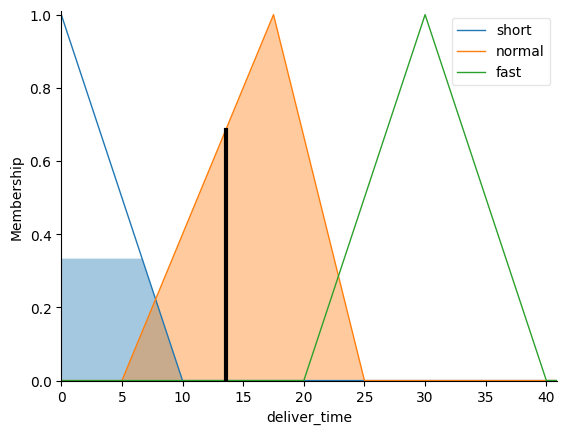

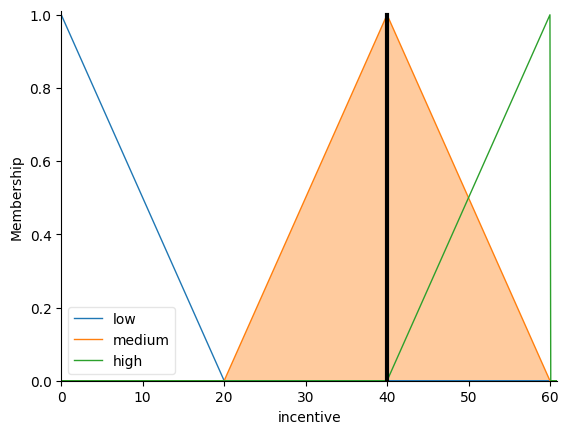

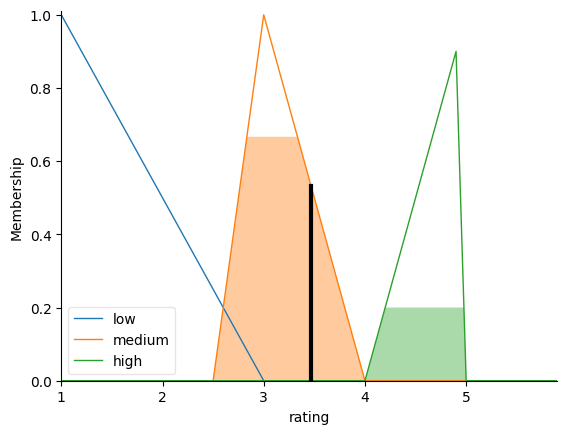

In [ ]:
#Bai 2.10

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


traffic = ctrl.Antecedent(np.arange(0, 11, 0.1), 'traffic')
distance = ctrl.Antecedent(np.arange(0, 16, 0.1), 'distance')
prepare_time = ctrl.Antecedent(np.arange(0, 26, 0.11), 'prepare_time')
weather = ctrl.Antecedent(np.arange(0, 3, 0.1), 'weather')
fatigued = ctrl.Antecedent(np.arange(0, 11, 0.1), 'fatigued')
deliver_time = ctrl.Consequent(np.arange(0, 41, 0.1), 'deliver_time')
incentive = ctrl.Consequent(np.arange(0, 61, 0.1), 'incentive')
rating = ctrl.Consequent(np.arange(1, 6, 0.1), 'rating')


traffic['low'] = fuzz.trimf(traffic.universe, [0, 0, 5])
traffic['medium'] = fuzz.trimf(traffic.universe, [2, 5, 8])
traffic['high'] = fuzz.trimf(traffic.universe, [5, 10, 10])

distance['short'] = fuzz.trimf(distance.universe, [0, 0, 7.5])
distance['medium'] = fuzz.trimf(distance.universe, [3.75, 7.5, 15])
distance['long'] = fuzz.trimf(distance.universe, [7.5, 15, 15])

prepare_time['fast'] = fuzz.trimf(prepare_time.universe, [0, 0, 10])
prepare_time['normal'] = fuzz.trimf(prepare_time.universe, [5, 10, 15])
prepare_time['slow'] = fuzz.trimf(prepare_time.universe, [10, 15, 20])

fatigued['low'] = fuzz.trimf(fatigued.universe, [0, 0, 5])
fatigued['medium'] = fuzz.trimf(fatigued.universe, [2, 5, 8])
fatigued['high'] = fuzz.trimf(fatigued.universe, [5, 10, 10])

weather['sunny'] = fuzz.trimf(weather.universe, [0, 0, 1])
weather['rainy'] = fuzz.trimf(weather.universe, [0, 1, 2])
weather['stormy'] = fuzz.trimf(weather.universe, [1, 2, 2])

deliver_time['short'] = fuzz.trimf(deliver_time.universe, [0, 0, 10])
deliver_time['normal'] = fuzz.trimf(deliver_time.universe, [5, 17.5, 25])
deliver_time['fast'] = fuzz.trimf(deliver_time.universe, [20, 30, 40])

incentive['low'] = fuzz.trimf(incentive.universe, [0, 0, 20])
incentive['medium'] = fuzz.trimf(incentive.universe, [20, 40, 60])
incentive['high'] = fuzz.trimf(incentive.universe, [40, 60, 60])

rating['low'] = fuzz.trimf(rating.universe, [1, 1, 3])
rating['medium'] = fuzz.trimf(rating.universe, [2.5, 3, 4])
rating['high'] = fuzz.trimf(rating.universe, [4, 5, 5])

rule1 = ctrl.Rule(fatigued['low'], rating['high'])
rule2 = ctrl.Rule(fatigued['medium'], rating['medium'])
rule3 = ctrl.Rule(fatigued['high'], rating['low'])
rule4 = ctrl.Rule(distance['long'] | weather['stormy'] | traffic['high'], deliver_time['fast'])
rule5 = ctrl.Rule(distance['short'] | weather['sunny'] | traffic['low'], deliver_time['short'])
rule6 = ctrl.Rule(fatigued['high'] & traffic['high'], deliver_time['fast'])
rule7 = ctrl.Rule(traffic['low'] & distance['short'], deliver_time['short'])
rule8 = ctrl.Rule(traffic['medium'] | distance['medium'], deliver_time['normal'])
rule9 = ctrl.Rule(traffic['high'] | distance['long'], deliver_time['fast'])
rule10 = ctrl.Rule(weather['sunny'], incentive['low'])
rule11 = ctrl.Rule(weather['rainy'], incentive['medium'])
rule12 = ctrl.Rule(weather['stormy'], incentive['high'])
rule13 = ctrl.Rule(prepare_time['fast'] & traffic['low'], deliver_time['short'])
rule14 = ctrl.Rule(prepare_time['normal'] & traffic['medium'], deliver_time['normal'])
rule15 = ctrl.Rule(prepare_time['slow'] & traffic['high'], deliver_time['fast'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)


fuzzy_system.input['traffic'] = 5
fuzzy_system.input['distance'] = 5
fuzzy_system.input['weather'] = 1
fuzzy_system.input['prepare_time'] = 10
fuzzy_system.input['fatigued'] = 4


fuzzy_system.compute()


print('Thời gian dự kiến:', fuzzy_system.output['deliver_time'])
print('Tiền thưởng:', fuzzy_system.output['incentive'])
print('Đánh giá:', fuzzy_system.output['rating'])


deliver_time.view(sim=fuzzy_system)
incentive.view(sim=fuzzy_system)
rating.view(sim=fuzzy_system)



Final Price: 9.119047619047619


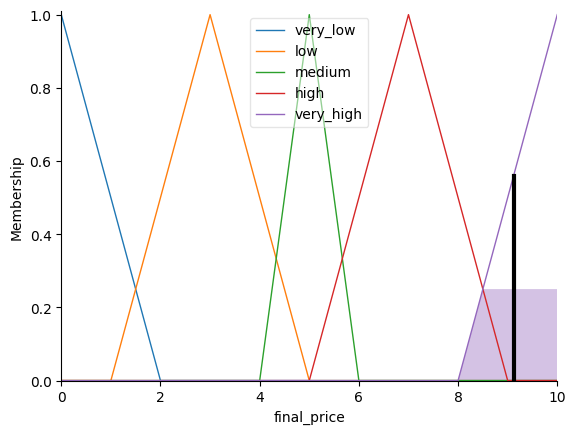

In [10]:
#Bai 2.11

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


demand = ctrl.Antecedent(np.arange(0, 11, 1), 'demand')
competitor_pricing = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_pricing')
production_cost = ctrl.Antecedent(np.arange(0, 11, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonality')
stock_level = ctrl.Antecedent(np.arange(0, 11, 1), 'stock_level')
final_price = ctrl.Consequent(np.arange(0, 11, 1), 'final_price')


demand['low'] = fuzz.trimf(demand.universe, [0, 0, 4])
demand['medium'] = fuzz.trimf(demand.universe, [3, 5, 7])
demand['high'] = fuzz.trimf(demand.universe, [6, 10, 10])

competitor_pricing['low'] = fuzz.trimf(competitor_pricing.universe, [0, 0, 4])
competitor_pricing['medium'] = fuzz.trimf(competitor_pricing.universe, [3, 5, 7])
competitor_pricing['high'] = fuzz.trimf(competitor_pricing.universe, [6, 10, 10])

production_cost['low'] = fuzz.trimf(production_cost.universe, [0, 0, 4])
production_cost['medium'] = fuzz.trimf(production_cost.universe, [3, 5, 7])
production_cost['high'] = fuzz.trimf(production_cost.universe, [6, 10, 10])

seasonality['off_peak'] = fuzz.trimf(seasonality.universe, [0, 0, 4])
seasonality['normal'] = fuzz.trimf(seasonality.universe, [3, 5, 7])
seasonality['peak'] = fuzz.trimf(seasonality.universe, [6, 10, 10])

stock_level['low'] = fuzz.trimf(stock_level.universe, [0, 0, 4])
stock_level['medium'] = fuzz.trimf(stock_level.universe, [3, 5, 7])
stock_level['high'] = fuzz.trimf(stock_level.universe, [6, 10, 10])

final_price['very_low'] = fuzz.trimf(final_price.universe, [0, 0, 2])
final_price['low'] = fuzz.trimf(final_price.universe, [1, 3, 5])
final_price['medium'] = fuzz.trimf(final_price.universe, [4, 5, 6])
final_price['high'] = fuzz.trimf(final_price.universe, [5, 7, 9])
final_price['very_high'] = fuzz.trimf(final_price.universe, [8, 10, 10])


rule1 = ctrl.Rule(demand['high'] & competitor_pricing['high'] & stock_level['low'], final_price['very_high'])
rule2 = ctrl.Rule(demand['high'] & seasonality['peak'] & stock_level['low'], final_price['very_high'])
rule3 = ctrl.Rule(demand['medium'] & production_cost['high'] & stock_level['low'], final_price['very_high'])
rule4 = ctrl.Rule(demand['high'] & competitor_pricing['medium'] & stock_level['medium'], final_price['high'])
rule5 = ctrl.Rule(demand['medium'] & competitor_pricing['high'] & stock_level['low'], final_price['high'])
rule6 = ctrl.Rule(demand['medium'] & seasonality['peak'] & stock_level['medium'], final_price['high'])
rule7 = ctrl.Rule(demand['medium'] & competitor_pricing['medium'] & stock_level['medium'], final_price['medium'])
rule8 = ctrl.Rule(demand['low'] & competitor_pricing['high'] & stock_level['medium'], final_price['medium'])
rule9 = ctrl.Rule(demand['medium'] & production_cost['medium'] & stock_level['medium'], final_price['medium'])
rule10 = ctrl.Rule(demand['low'] & competitor_pricing['low'] & stock_level['high'], final_price['low'])
rule11 = ctrl.Rule(demand['medium'] & production_cost['low'] & stock_level['high'], final_price['low'])
rule12 = ctrl.Rule(demand['low'] & seasonality['off_peak'] & stock_level['high'], final_price['low'])
rule13 = ctrl.Rule(demand['low'] & competitor_pricing['low'] & stock_level['high'], final_price['very_low'])
rule14 = ctrl.Rule(demand['low'] & seasonality['off_peak'] & stock_level['high'], final_price['very_low'])
rule15 = ctrl.Rule(demand['medium'] & competitor_pricing['low'] & stock_level['high'], final_price['very_low'])


pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
fuzzy_pricing = ctrl.ControlSystemSimulation(pricing_ctrl)


fuzzy_pricing.input['demand'] = 7
fuzzy_pricing.input['competitor_pricing'] = 6
fuzzy_pricing.input['production_cost'] = 5
fuzzy_pricing.input['seasonality'] = 8
fuzzy_pricing.input['stock_level'] = 3

fuzzy_pricing.compute()

print('Final Price:', fuzzy_pricing.output['final_price'])
final_price.view(sim=fuzzy_pricing)

Ride Price: 2.031609195402299
Customer Reward: 2.0330722367275893


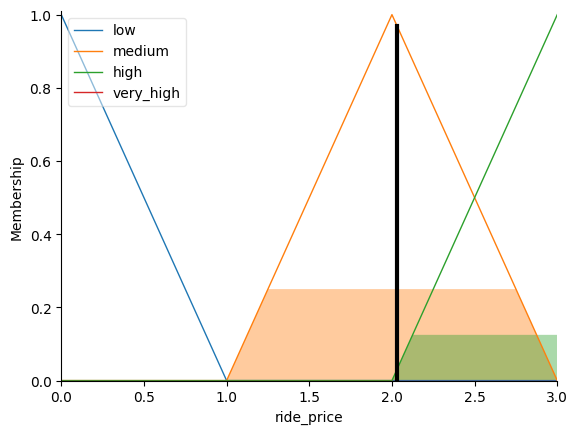

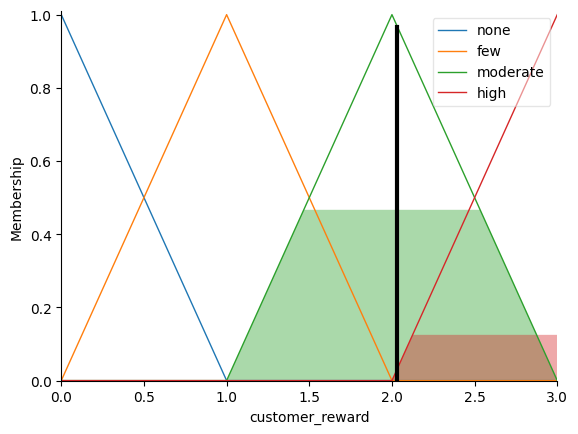

In [ ]:
#Bai 1

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

ride_distance = ctrl.Antecedent(np.arange(0, 51, 1), 'ride_distance')
traffic_condition = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_condition')
demand_level = ctrl.Antecedent(np.arange(0, 101, 1), 'demand_level')
weather_condition = ctrl.Antecedent(np.arange(0, 3, 1), 'weather_condition')
customer_rating = ctrl.Antecedent(np.arange(1, 5.1, 0.1), 'customer_rating')
ride_punctuality = ctrl.Antecedent(np.arange(0, 101, 1), 'ride_punctuality')
ride_price = ctrl.Consequent(np.arange(0, 4, 1), 'ride_price')
customer_reward = ctrl.Consequent(np.arange(0, 4, 1), 'customer_reward')


ride_distance['short'] = fuzz.trimf(ride_distance.universe, [0, 0, 3])
ride_distance['medium'] = fuzz.trimf(ride_distance.universe, [2, 8, 15])
ride_distance['long'] = fuzz.trimf(ride_distance.universe, [6, 20, 50])
ride_distance['very_long'] = fuzz.trimf(ride_distance.universe, [15, 50, 50])

traffic_condition['low'] = fuzz.trimf(traffic_condition.universe, [0, 0, 30])
traffic_condition['medium'] = fuzz.trimf(traffic_condition.universe, [20, 50, 70])
traffic_condition['high'] = fuzz.trimf(traffic_condition.universe, [60, 100, 100])

demand_level['low'] = fuzz.trimf(demand_level.universe, [0, 0, 30])
demand_level['medium'] = fuzz.trimf(demand_level.universe, [20, 50, 70])
demand_level['high'] = fuzz.trimf(demand_level.universe, [60, 100, 100])

weather_condition['good'] = fuzz.trimf(weather_condition.universe, [0, 0, 1])
weather_condition['moderate'] = fuzz.trimf(weather_condition.universe, [0, 1, 2])
weather_condition['bad'] = fuzz.trimf(weather_condition.universe, [1, 2, 2])

customer_rating['poor'] = fuzz.trimf(customer_rating.universe, [1, 1, 2.5])
customer_rating['average'] = fuzz.trimf(customer_rating.universe, [2, 3, 4])
customer_rating['good'] = fuzz.trimf(customer_rating.universe, [3.5, 5, 5])

ride_punctuality['late'] = fuzz.trimf(ride_punctuality.universe, [0, 0, 50])
ride_punctuality['on_time'] = fuzz.trimf(ride_punctuality.universe, [40, 60, 80])
ride_punctuality['early'] = fuzz.trimf(ride_punctuality.universe, [70, 100, 100])

ride_price['low'] = fuzz.trimf(ride_price.universe, [0, 0, 1])
ride_price['medium'] = fuzz.trimf(ride_price.universe, [1, 2, 3])
ride_price['high'] = fuzz.trimf(ride_price.universe, [2, 3, 4])
ride_price['very_high'] = fuzz.trimf(ride_price.universe, [3, 4, 4])

customer_reward['none'] = fuzz.trimf(customer_reward.universe, [0, 0, 1])
customer_reward['few'] = fuzz.trimf(customer_reward.universe, [1, 1, 2])
customer_reward['moderate'] = fuzz.trimf(customer_reward.universe, [1, 2, 3])
customer_reward['high'] = fuzz.trimf(customer_reward.universe, [2, 3, 3])

rules = [
    ctrl.Rule(ride_distance['short'] & traffic_condition['low'] & demand_level['low'], ride_price['low']),
    ctrl.Rule(ride_distance['short'] & traffic_condition['medium'] & demand_level['high'], ride_price['medium']),
    ctrl.Rule(ride_distance['medium'] & traffic_condition['high'] & demand_level['high'], ride_price['high']),
    ctrl.Rule(ride_distance['long'] & traffic_condition['medium'] & weather_condition['good'], ride_price['medium']),
    ctrl.Rule(ride_distance['long'] & traffic_condition['high'] & weather_condition['bad'], ride_price['very_high']),
    ctrl.Rule(ride_distance['very_long'] & traffic_condition['high'] & demand_level['high'], ride_price['very_high']),
    ctrl.Rule(ride_distance['short'] & traffic_condition['high'] & weather_condition['bad'], ride_price['high']),
    ctrl.Rule(ride_distance['very_long'] & weather_condition['bad'], ride_price['very_high']),
    ctrl.Rule(ride_distance['medium'] & traffic_condition['medium'] & weather_condition['moderate'], ride_price['medium']),
    ctrl.Rule(ride_distance['medium'] & traffic_condition['low'] & demand_level['low'], ride_price['medium']),
    ctrl.Rule(customer_rating['good'] & ride_punctuality['early'], customer_reward['high']),
    ctrl.Rule(customer_rating['average'] & ride_punctuality['on_time'], customer_reward['moderate']),
    ctrl.Rule(customer_rating['poor'] & ride_punctuality['late'], customer_reward['none']),
    ctrl.Rule(ride_distance['long'] & traffic_condition['high'] & ride_punctuality['on_time'], customer_reward['high']),
    ctrl.Rule(ride_distance['medium'] & traffic_condition['medium'] & customer_rating['good'], customer_reward['moderate']),
    ctrl.Rule(customer_rating['poor'] & ride_punctuality['late'], customer_reward['none']),
    ctrl.Rule(ride_distance['very_long'] & weather_condition['bad'] & customer_rating['good'], customer_reward['high']),
    ctrl.Rule(ride_distance['short'] & customer_rating['average'] & ride_punctuality['on_time'], customer_reward['few']),
    ctrl.Rule(ride_distance['long'] & traffic_condition['high'] & ride_punctuality['late'], customer_reward['few']),
    ctrl.Rule(ride_distance['medium'] & weather_condition['moderate'] & customer_rating['good'], customer_reward['moderate']),
]


pricing_ctrl = ctrl.ControlSystem(rules)
fuzzy_pricing = ctrl.ControlSystemSimulation(pricing_ctrl)


fuzzy_pricing.input['ride_distance'] = 10
fuzzy_pricing.input['traffic_condition'] = 65
fuzzy_pricing.input['demand_level'] = 75
fuzzy_pricing.input['weather_condition'] = 1
fuzzy_pricing.input['customer_rating'] = 4.2
fuzzy_pricing.input['ride_punctuality'] = 50


fuzzy_pricing.compute()


print('Ride Price:', fuzzy_pricing.output['ride_price'])
print('Customer Reward:', fuzzy_pricing.output['customer_reward'])
ride_price.view(sim=fuzzy_pricing)
customer_reward.view(sim=fuzzy_pricing)

Số lượng đơn hàng cần kết hợp: 8.483333333333333
Ưu tiên giao hàng: 5.000000000000002


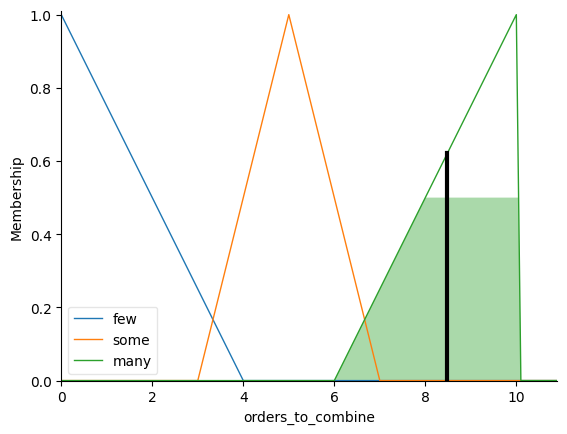

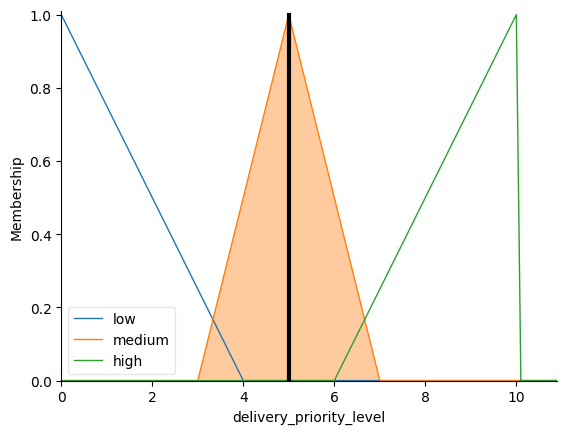

In [15]:
#Bai 4

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

order_density = ctrl.Antecedent(np.arange(0, 11, 0.1), 'order_density')
delivery_urgency = ctrl.Antecedent(np.arange(0, 11, 0.1), 'delivery_urgency')
driver_load = ctrl.Antecedent(np.arange(0, 11, 0.1), 'driver_load')
driver_current = ctrl.Antecedent(np.arange(0, 11, 0.1), 'driver_current')
traffic = ctrl.Antecedent(np.arange(0, 11, 0.1), 'delivery_time')
profit_per_delivery = ctrl.Antecedent(np.arange(0, 11, 0.1), 'profit_per_delivery')
orders_to_combine = ctrl.Consequent(np.arange(0, 11, 0.1), 'orders_to_combine')
delivery_priority_level = ctrl.Consequent(np.arange(0, 11, 0.1), 'delivery_priority_level')

order_density['low'] = fuzz.trimf(order_density.universe, [0, 0, 4])
order_density['medium'] = fuzz.trimf(order_density.universe, [3, 5, 7])
order_density['high'] = fuzz.trimf(order_density.universe, [6, 10, 10])

delivery_urgency['low'] = fuzz.trimf(delivery_urgency.universe, [0, 0, 4])
delivery_urgency['medium'] = fuzz.trimf(delivery_urgency.universe, [3, 5, 7])
delivery_urgency['high'] = fuzz.trimf(delivery_urgency.universe, [6, 10, 10])

driver_load['low'] = fuzz.trimf(driver_load.universe, [0, 0, 4])
driver_load['medium'] = fuzz.trimf(driver_load.universe, [3, 5, 7])
driver_load['high'] = fuzz.trimf(driver_load.universe, [6, 10, 10])

driver_current['low'] = fuzz.trimf(driver_current.universe, [0, 0, 4])
driver_current['medium'] = fuzz.trimf(driver_current.universe, [3, 5, 7])
driver_current['high'] = fuzz.trimf(driver_current.universe, [6, 10, 10])

traffic['low'] = fuzz.trimf(traffic.universe, [0, 0, 4])
traffic['medium'] = fuzz.trimf(traffic.universe, [3, 5, 7])
traffic['high'] = fuzz.trimf(traffic.universe, [6, 10, 10])

profit_per_delivery['low'] = fuzz.trimf(profit_per_delivery.universe, [0, 0, 4])
profit_per_delivery['medium'] = fuzz.trimf(profit_per_delivery.universe, [3, 5, 7])
profit_per_delivery['high'] = fuzz.trimf(profit_per_delivery.universe, [6, 10, 10])

orders_to_combine['few'] = fuzz.trimf(orders_to_combine.universe, [0, 0, 4])
orders_to_combine['some'] = fuzz.trimf(orders_to_combine.universe, [3, 5, 7])
orders_to_combine['many'] = fuzz.trimf(orders_to_combine.universe, [6, 10, 10])

delivery_priority_level['low'] = fuzz.trimf(delivery_priority_level.universe, [0, 0, 4])
delivery_priority_level['medium'] = fuzz.trimf(delivery_priority_level.universe, [3, 5, 7])
delivery_priority_level['high'] = fuzz.trimf(delivery_priority_level.universe, [6, 10, 10])

rule1 = ctrl.Rule(order_density['high'] & driver_load['low'] & traffic['low'], orders_to_combine['many'])
rule2 = ctrl.Rule(order_density['medium'] & traffic['high'] & delivery_urgency['medium'], orders_to_combine['some'])
rule3 = ctrl.Rule(driver_load['high'] & order_density['high'] & profit_per_delivery['medium'], orders_to_combine['some'])
rule4 = ctrl.Rule(order_density['low'] & delivery_urgency['high'] & traffic['medium'], orders_to_combine['some'])
rule5 = ctrl.Rule(profit_per_delivery['high'] & delivery_urgency['high'] & traffic['high'], orders_to_combine['some'])
rule6 = ctrl.Rule(delivery_urgency['high'] & profit_per_delivery['high'], delivery_priority_level['high'])
rule7 = ctrl.Rule(delivery_urgency['medium'] & traffic['medium'], delivery_priority_level['medium'])
rule8 = ctrl.Rule(delivery_urgency['low'] & order_density['high'] & profit_per_delivery['low'], delivery_priority_level['low'])
rule9 = ctrl.Rule(order_density['high'] & driver_load['low'], orders_to_combine['many'])
rule10 = ctrl.Rule(delivery_urgency['medium'], delivery_priority_level['medium'])

order_combination_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule9])
delivery_priority_ctrl = ctrl.ControlSystem([rule6, rule7, rule8, rule10])

order_combination_sim = ctrl.ControlSystemSimulation(order_combination_ctrl)
delivery_priority_sim = ctrl.ControlSystemSimulation(delivery_priority_ctrl)


order_combination_sim.input['order_density'] = 8
delivery_priority_sim.input['delivery_urgency'] = 5
order_combination_sim.input['driver_load'] = 2
order_combination_sim.input['delivery_time'] = 5
order_combination_sim.input['profit_per_delivery'] = 5
delivery_priority_sim.input['profit_per_delivery'] = 5

delivery_priority_sim.compute()
order_combination_sim.compute()


print("Số lượng đơn hàng cần kết hợp:", order_combination_sim.output['orders_to_combine'])
print("Ưu tiên giao hàng:", delivery_priority_sim.output['delivery_priority_level'])


orders_to_combine.view(sim=order_combination_sim)
delivery_priority_level.view(sim=delivery_priority_sim)

Recommended Discount Percentage: 15.000000000000007


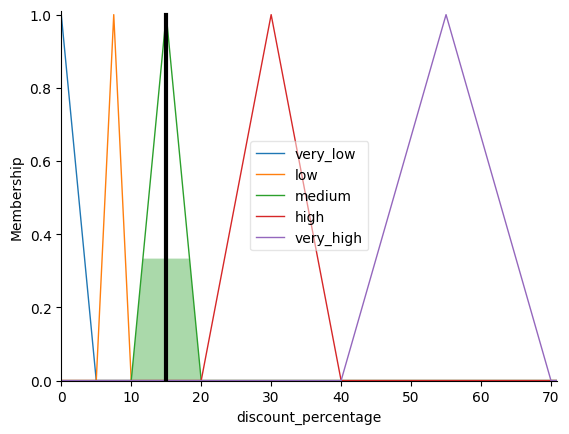

In [16]:
#Bai 3

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

product_demand = ctrl.Antecedent(np.arange(0, 11, 0.1), 'product_demand')
competitor_pressure = ctrl.Antecedent(np.arange(0, 11, 0.1), 'competitor_pressure')
store_reputation = ctrl.Antecedent(np.arange(0, 11, 0.1), 'store_reputation')
profit_margin = ctrl.Antecedent(np.arange(0, 11, 0.1), 'profit_margin')
seasonal_demand = ctrl.Antecedent(np.arange(0, 11, 0.1), 'seasonal_demand')
discount_percentage = ctrl.Consequent(np.arange(0, 71, 0.1), 'discount_percentage')

product_demand['low'] = fuzz.trimf(product_demand.universe, [0, 0, 4])
product_demand['medium'] = fuzz.trimf(product_demand.universe, [2, 5, 8])
product_demand['high'] = fuzz.trimf(product_demand.universe, [6, 10, 10])

competitor_pressure['low'] = fuzz.trimf(competitor_pressure.universe, [0, 0, 4])
competitor_pressure['medium'] = fuzz.trimf(competitor_pressure.universe, [2, 5, 8])
competitor_pressure['high'] = fuzz.trimf(competitor_pressure.universe, [6, 10, 10])

store_reputation['low'] = fuzz.trimf(store_reputation.universe, [0, 0, 4])
store_reputation['medium'] = fuzz.trimf(store_reputation.universe, [2, 5, 8])
store_reputation['high'] = fuzz.trimf(store_reputation.universe, [6, 10, 10])

profit_margin['low'] = fuzz.trimf(profit_margin.universe, [0, 0, 4])
profit_margin['medium'] = fuzz.trimf(profit_margin.universe, [2, 5, 8])
profit_margin['high'] = fuzz.trimf(profit_margin.universe, [6, 10, 10])

seasonal_demand['low'] = fuzz.trimf(seasonal_demand.universe, [0, 0, 4])
seasonal_demand['medium'] = fuzz.trimf(seasonal_demand.universe, [2, 5, 8])
seasonal_demand['high'] = fuzz.trimf(seasonal_demand.universe, [6, 10, 10])

discount_percentage['very_low'] = fuzz.trimf(discount_percentage.universe, [0, 0, 5])
discount_percentage['low'] = fuzz.trimf(discount_percentage.universe, [5, 7.5, 10])
discount_percentage['medium'] = fuzz.trimf(discount_percentage.universe, [10, 15, 20])
discount_percentage['high'] = fuzz.trimf(discount_percentage.universe, [20, 30, 40])
discount_percentage['very_high'] = fuzz.trimf(discount_percentage.universe, [40, 55, 70])

rules = [
    ctrl.Rule(product_demand['high'] & competitor_pressure['low'] & profit_margin['low'], discount_percentage['very_low']),
    ctrl.Rule(product_demand['low'] & competitor_pressure['high'] & profit_margin['high'], discount_percentage['high']),
    ctrl.Rule(store_reputation['high'] & profit_margin['medium'] & seasonal_demand['high'], discount_percentage['medium']),
    ctrl.Rule(competitor_pressure['high'] & seasonal_demand['high'] & profit_margin['high'], discount_percentage['very_high']),
    ctrl.Rule(store_reputation['low'] & product_demand['medium'] & profit_margin['low'], discount_percentage['medium']),
    ctrl.Rule(product_demand['high'] & seasonal_demand['low'] & competitor_pressure['low'], discount_percentage['very_low']),
    ctrl.Rule(profit_margin['high'] & competitor_pressure['medium'] & seasonal_demand['medium'], discount_percentage['medium']),
    ctrl.Rule(product_demand['medium'] & profit_margin['medium'] & competitor_pressure['medium'], discount_percentage['medium']),
    ctrl.Rule(store_reputation['high'] & seasonal_demand['low'] & profit_margin['high'], discount_percentage['low']),
    ctrl.Rule(store_reputation['low'] & competitor_pressure['high'] & profit_margin['low'], discount_percentage['high']),
    ctrl.Rule(product_demand['low'] & seasonal_demand['high'] & competitor_pressure['high'], discount_percentage['very_high']),
    ctrl.Rule(profit_margin['low'] & competitor_pressure['low'] & seasonal_demand['low'], discount_percentage['low']),
    ctrl.Rule(product_demand['medium'] & competitor_pressure['high'] & profit_margin['high'], discount_percentage['high'])
]


discount_control_system = ctrl.ControlSystem(rules)
discount_simulator = ctrl.ControlSystemSimulation(discount_control_system)


discount_simulator.input['product_demand'] = 6
discount_simulator.input['competitor_pressure'] = 7
discount_simulator.input['store_reputation'] = 5
discount_simulator.input['profit_margin'] = 4
discount_simulator.input['seasonal_demand'] = 8

discount_simulator.compute()
print("Recommended Discount Percentage:", discount_simulator.output['discount_percentage'])
discount_percentage.view(sim=discount_simulator)

Tỷ lệ giảm giá đề xuất: 19.999999999999996


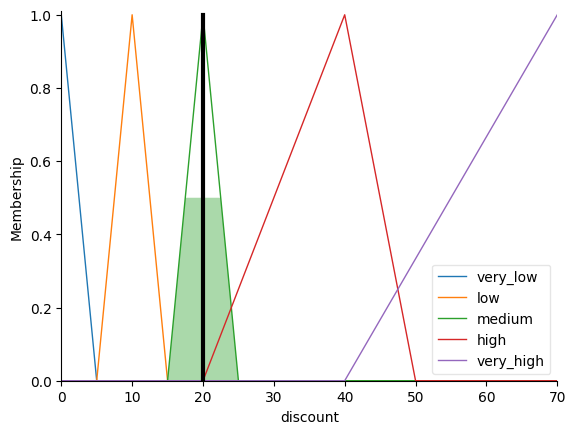

In [11]:
#Bai 2

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

store_rating = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'store_rating')
sales_volume = ctrl.Antecedent(np.arange(0, 101, 1), 'sales_volume')
profit_margin = ctrl.Antecedent(np.arange(0, 101, 1), 'profit_margin')
seasonal_event = ctrl.Antecedent(np.arange(0, 101, 1), 'seasonal_event')
competitor_discounts = ctrl.Antecedent(np.arange(0, 101, 1), 'competitor_discounts')


discount = ctrl.Consequent(np.arange(0, 71, 1), 'discount')

store_rating['low'] = fuzz.trimf(store_rating.universe, [0, 0, 4.0])
store_rating['medium'] = fuzz.trimf(store_rating.universe, [3.5, 4.25, 4.5])
store_rating['high'] = fuzz.trimf(store_rating.universe, [4.0, 5.0, 5.0])

sales_volume['low'] = fuzz.trimf(sales_volume.universe, [0, 0, 40])
sales_volume['medium'] = fuzz.trimf(sales_volume.universe, [30, 50, 70])
sales_volume['high'] = fuzz.trimf(sales_volume.universe, [60, 100, 100])

profit_margin['low'] = fuzz.trimf(profit_margin.universe, [0, 0, 40])
profit_margin['medium'] = fuzz.trimf(profit_margin.universe, [30, 50, 70])
profit_margin['high'] = fuzz.trimf(profit_margin.universe, [60, 100, 100])

seasonal_event['none'] = fuzz.trimf(seasonal_event.universe, [0, 0, 40])
seasonal_event['moderate'] = fuzz.trimf(seasonal_event.universe, [30, 50, 70])
seasonal_event['high'] = fuzz.trimf(seasonal_event.universe, [60, 100, 100])

competitor_discounts['low'] = fuzz.trimf(competitor_discounts.universe, [0, 0, 40])
competitor_discounts['medium'] = fuzz.trimf(competitor_discounts.universe, [30, 50, 70])
competitor_discounts['high'] = fuzz.trimf(competitor_discounts.universe, [60, 100, 100])

discount['very_low'] = fuzz.trimf(discount.universe, [0, 0, 5])
discount['low'] = fuzz.trimf(discount.universe, [5, 10, 15])
discount['medium'] = fuzz.trimf(discount.universe, [15, 20, 25])
discount['high'] = fuzz.trimf(discount.universe, [20, 40, 50])
discount['very_high'] = fuzz.trimf(discount.universe, [40, 70, 70])


rule1 = ctrl.Rule(sales_volume['high'] & competitor_discounts['low'] & profit_margin['low'], discount['very_low'])
rule2 = ctrl.Rule(sales_volume['low'] & competitor_discounts['high'] & profit_margin['high'], discount['high'])
rule3 = ctrl.Rule(store_rating['high'] & profit_margin['medium'] & seasonal_event['high'], discount['medium'])
rule4 = ctrl.Rule(competitor_discounts['high'] & seasonal_event['high'] & profit_margin['high'], discount['very_high'])
rule5 = ctrl.Rule(store_rating['low'] & sales_volume['medium'] & profit_margin['low'], discount['medium'])
rule6 = ctrl.Rule(sales_volume['high'] & seasonal_event['none'] & competitor_discounts['low'], discount['very_low'])
rule7 = ctrl.Rule(profit_margin['high'] & competitor_discounts['medium'] & seasonal_event['moderate'], discount['medium'])
rule8 = ctrl.Rule(profit_margin['high'] & seasonal_event['high'] & competitor_discounts['medium'], discount['medium'])


discount_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
discount_simulation = ctrl.ControlSystemSimulation(discount_ctrl)


rating_value = 4.2
sales_value = 50
profit_value = 90
season_value = 80
competitor_value = 50

discount_simulation.input['store_rating'] = rating_value
discount_simulation.input['sales_volume'] = sales_value
discount_simulation.input['profit_margin'] = profit_value
discount_simulation.input['seasonal_event'] = season_value
discount_simulation.input['competitor_discounts'] = competitor_value


discount_simulation.compute()


print("Tỷ lệ giảm giá đề xuất:", discount_simulation.output['discount'])


discount.view(sim=discount_simulation)


In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.2 MB/s eta 0:00:00
